In [135]:
#https://blog.csdn.net/qq_35649669/article/details/84990183
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model

In [136]:
from sklearn import preprocessing

dataframe = pd.read_csv('./AirPassengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 在下一步会讲解
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.90)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [137]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [138]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

import time
# print (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
# model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions
# print (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))


Epoch 1/50
 - 4s - loss: 0.0674
Epoch 2/50
 - 0s - loss: 0.0409
Epoch 3/50
 - 0s - loss: 0.0258
Epoch 4/50
 - 0s - loss: 0.0186
Epoch 5/50
 - 0s - loss: 0.0159
Epoch 6/50
 - 0s - loss: 0.0150
Epoch 7/50
 - 0s - loss: 0.0145
Epoch 8/50
 - 0s - loss: 0.0141
Epoch 9/50
 - 0s - loss: 0.0139
Epoch 10/50
 - 0s - loss: 0.0136
Epoch 11/50
 - 0s - loss: 0.0135
Epoch 12/50
 - 0s - loss: 0.0131
Epoch 13/50
 - 0s - loss: 0.0130
Epoch 14/50
 - 0s - loss: 0.0126
Epoch 15/50
 - 0s - loss: 0.0126
Epoch 16/50
 - 0s - loss: 0.0122
Epoch 17/50
 - 0s - loss: 0.0122
Epoch 18/50
 - 0s - loss: 0.0119
Epoch 19/50
 - 0s - loss: 0.0119
Epoch 20/50
 - 0s - loss: 0.0115
Epoch 21/50
 - 0s - loss: 0.0113
Epoch 22/50
 - 0s - loss: 0.0114
Epoch 23/50
 - 0s - loss: 0.0111
Epoch 24/50
 - 0s - loss: 0.0111
Epoch 25/50
 - 0s - loss: 0.0111
Epoch 26/50
 - 0s - loss: 0.0109
Epoch 27/50
 - 0s - loss: 0.0107
Epoch 28/50
 - 0s - loss: 0.0108
Epoch 29/50
 - 0s - loss: 0.0110
Epoch 30/50
 - 0s - loss: 0.0107
Epoch 31/50
 - 0s -

In [139]:
# import time
# print (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
# model = load_model(os.path.join("DATA","Test" + ".h5"))
# print (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


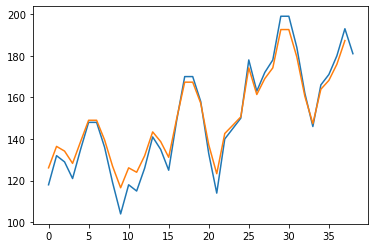

[[230.]
 [242.]
 [209.]]


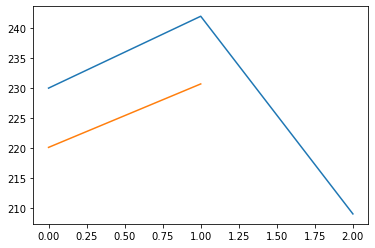

In [140]:
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.show()
plt.plot(testY)

print (testY)


plt.plot(testPredict[1:])
plt.show()

In [18]:
!pip install h5py==2.8.0
keras 2.2.4